# Maschinelles Lernen

Nun kommen wir (endlich) zum eigentlichen Machine Learning

In [1]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
warnings.warn_explicit = ignore_warn

import pickle
from scipy import stats
from scipy.stats import norm, skew #for some statistics

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points



# Daten aus dem vorigen Schritt laden


In [2]:
with open('../data/house-prices-advanced-regression-techniques/x_preprocessed_train.pkl', 'rb') as handle:
    X_preprocessed_train = pickle.load(handle)

with open('../data/house-prices-advanced-regression-techniques/y_train.pkl', 'rb') as handle:
    y_preprocessed_train = pickle.load(handle)
    
with open('../data/house-prices-advanced-regression-techniques/x_test.pkl', 'rb') as handle:
    X_preprocessed_test = pickle.load(handle)


# Verfahren maschinellen Lernens

# Supervised Learning

<br>
<img src="../img/ml-overview.png" width="70%" align="center">
<br>

## Supervised Learning
Der Bereich des Supervised Learnings (das überwachte maschinelle Lernen) lässt sich in drei wichtige Bereiche unterteilen: die Klassifikation, die Regression und die Segmentierung. Für die Klassifikation kann die logistische Regression eingesetzt werden. Vor allem die Support Vector Machine (SVM) und verschiedene Decision-Tree-Verfahren sind hier als Alternativen hervorzuheben. Tiefe neuronale Netze sind in diesem Bereich die wichtigsten Vertreter. Beim überwachten maschinellen Lernen werden Algorithmen verwendet, um ein Modell zu trainieren, das Muster in einem Datensatz mit Bezeichnungen und Merkmalen findet. Das trainierte Modell wird sodann verwendet, um die Bezeichnungen für die Merkmale eines neuen Datensatzes vorherzusagen. Entscheidend hierbei ist, dass für das Training Annotationen – d. h. manuelle Zuordnungen zwischen Eingangsdaten und Ausgangsdaten – vorliegen. Ist das Modell trainiert, dann kann für unbekannte Daten („New Data“) durch die Benut-zung des Modells ein Label vorhergesagt werden („Use Model“).

<br>
<img src="../img/supervised.png" width="70%" align="center">
<br>

# Prognose, Verlust und Optimierung
Bei vielen Verfahren des maschinellen Lernens ist das Ziel, ausgehend von bekannten Eingangsdaten eine Vorhersage über eine unbekannte Zielgröße zu treffen. Beim überwachten Lernen trainiert man ein Modell mit Eingangsdaten, für die der „richtige“ Wert der Zielgröße bekannt ist, um das Modell dahingehend zu optimieren, dass es auch für Eingangsdaten die Zielgröße vorhersagen kann, zu denen diese nicht bekannt ist. Wichtige Begriffe sind Prognose, Verlust und Optimierung. Ausgegangen wird von Eingangsdaten, die in der Abbildung mit (1) bezeichnet sind.
Das können je nach Verfahren Bilder, Töne, numerische Werte, Texte oder andere Daten (z. B. Sensordaten aus dem Betrieb von Maschinen) sein. Für diese Daten ist die Zielgröße (engl. Target) – auch als $Y$ bezeichnet – bekannt, in der Abbildung als (2) bezeichnet. Im Beispiel geht es um eine Klassifizierung, d. h. die Entscheidung, welche Zahl eine handgeschriebene Ziffer darstellt. Man spricht davon, dass die Eingangsdaten – auch als $X$ bezeichnet – einer bestimmten Klasse zugehören (hier sind dies die Klassen 0 bis 9). Man führt nun die Eingangsdaten dem Modell zu und berechnet mit Hilfe des Modells die Zielgröße. Dies wird als Prognose (3) bezeichnet und mit $\hat{Y}$ gekennzeichnet. An anderen Stellen ist auch vom Abschätzen oder einer Vorhersage die Rede. Dies wird für alle Trainingsdaten wiederholt. In Schritt (4) wird nun für alle Ergebnisse $Y$ mit $\hat{Y}$ verglichen und die „Abweichung“ zwischen $Y$ und $\hat{Y}$ für diesen Durchlauf ermittelt. Diese Abweichung bezeichnet man als Verlust. Hierfür kommt die Verlustfunktion zum Einsatz, mit deren Hilfe diese Abweichung berechnet werden kann. Das Ergebnis der Verlustfunktion wird nun genutzt, um die internen Parameter – die so genannten Modellparameter – derart zu verändern, dass im nächsten Durchlauf der Verlust verringert wird. Dieses Verfahren wird Optimierung genannt und in der Abbildung mit (5) bezeichnet. Mit Hilfe eine Optimierungsverfahrens, z. B. dem so genannten Gradientenabstieg, können nun die Modellparameter optimiert werden. Ergänzend sei erwähnt, dass es neben dem Gradientenabstieg viele weitere Optimierungsverfahren gibt, die unterschiedliche Eigenschaften, Vor- und Nachteile haben.

<br>
<img src="../img/prozess.png" width="70%" align="center">
<br>

# Regression

## Interpolation

<br>
<img src="../img/interpolation.png" width="70%" align="center">
<br>

## Extrapolation

<img src="../img/extrapolation.png" width="70%" align="center">
<br>

## Decision Tree

Mit Hilfe von Decision-Tree-Algorithmen werden aus den Attributen der annotierten Daten binäre Bäume erstellt, entlang derer ein Result (also die Annotation) entweder wahr oder falsch ist. Hier-durch kann ein Result über mehrere Äste des Baums als wahr oder falsch erkannt werden. In der Abbildung wird ein solcher Decision Tree vorgestellt. Im Beispiel wird die Vorhersage von Kaufpreisen von Häusern dargestellt. Die zugrunde liegenden Daten werden im gezeigten Decision Tree angeordnet und können dann zum Training und schließlich zur Vorhersage verwendet werden. Decision Trees können sowohl zur Klassifizierung als auch zur Interpolation kontinuierlicher – also reeller – Werte herangezogen werden. Das Ergebnis eines Decision Tree ist also entweder eine Ganzzahl (die „Nummer“ der gefundenen Klasse) oder eine Fließkommazahl. 


<img src="../img/decisiontree.png" width="70%" align="center">
<br>

## Bagging

Bagging ist eine Methode des so genannten Ensemble Learnings. Hierbei wird nicht nur eine Hypothese – also eine Prognose anhand eines trainierten Zustandes eines Modells – zur Vorhersage herangezogen, sondern eine Sammlung solcher Hypothesen. Beim Bagging werden zufällig $N$ Samples (Muster)  aus den Trainingsdaten entnommen, wobei bei jedem zufälligen Ziehen der Muster jeder Datensatz erneut gezogen werden darf. Es kann also Überlappungen in den gezogenen Daten geben. Dann wird das Modell mit diesen $N$ Mustern trainiert, um die erste Hypothese zu erhalten. Weitere $K$ Hypothesen entstehen durch die zufällige Auswahl von K Mustergruppen (je bestehend aus $N$ einzelnen Mustern, also Trainingsdaten). Wird nun das Modell angewendet, werden alle so trainierten $K$ Hypothesen für eine Prognose herangezogen. Bei Klassifizierungsaufgaben wird dann eine Mehrheitsentscheidung dieser Prognosen berechnet, d. h., diejenige Klasse, für die die meisten Hypothesen „stimmen“, wird als Ergebnis zurückgegeben. Bei Regressionsproblemen wird der Durchschnitt der Hypothesen gebildet:

$$h(x)\ =\ \frac{1}{K}\sum_{i=1}^{K}{h_i(x)}$$

Hierbei ist $h_i$ die Hypothese bezogen auf den (unbekannten) Beispieldatensatz $x$. Das Bagging kann gut angewendet werden, wenn wenig Trainingsdaten zur Verfügung stehen, und führt zu weniger Varianz in den Ergebnissen. Darüber hinaus kann das Verfahren gut parallelisiert werden.

## Boosting

Beim Boosting wird ähnlich wie beim Bagging vorgegangen. Allerdings wird nicht für jede Hypothese eine neue zufällige Sammlung von Mustern aus den Trainingsdaten entnommen, sondern jede weitere Hypothese $h_{i+1}$ wird aus der Vorgängerhypothese $h_i$ abgeleitet. Beim Boosting wird jedem Datensatz der Trainingsdaten ein Gewicht $w_j\geq0$ zugeordnet, das festlegt, „wie wichtig“ es für das Training sein soll. 
Zunächst erhält jedes Muster $x_j$ (jeder Datensatz der Trainingsdaten) das Gewicht $w_j=1$. Man kann sich das Gewicht derart vorstellen, dass es die Häufigkeit bezeichnet, mit der ein Trainingsdatensatz beim Training wiederholt verwendet wird. Ein großes Gewicht erhöht also die Bedeutung eines Datensatzes für das Training. Wurde nun durch das Training eine Hypothese $h_1$ ermittelt, so wird diese Hypothese falsche Ergebnisse für einige der Trainingsdaten ermitteln. Solche Trainingsdaten sollen durch die Vergrößerung des jeweiligen Gewichts stärkeren Einfluss auf das Training erhalten, die übrigen ein geringeres. Anhand dieses gewichteten Trainingssatzes wird nun erneut ein Training durchgeführt, das eine neue Hypothese $h_2$ hervorbringt. Dies wird so lange wiederholt, bis $K$ Hypothesen – mithin trainierte Modelle – vorliegen. Diese Vorgehensweise hat zur Folge, dass ein Modell stärker mit „schwierigen“ Datensätzen umgehen lernen muss. Diese Vorgehensweise ist ein Greedy-Algorithmus  – d. h. ein Algorithmus, der versucht, als nächsten Schritte immer den im Moment als besten Schritt erscheinenden auszuführen, denn es erfolgt kein Backtracking; eine einmal gefundene Hypothese wird nicht nachträglich verworfen, sollte sie sich als weniger geeignet herausstellen. Stehen nun $K$ Hypothesen fest, werden erneut Parameter vergeben – diesmal je ein $z_i$ für jede Hypothese $h_i$. Für eine Regression oder Klassifikation ergibt sich:
$$h(x)\ =\ \sum_{i=1}^{K}z_i\bullet h_i(x)$$

Ein bedeutender Boosting-Algorithmus ist der AdaBoost-Algorithmus. Dieser hat die besondere Eigenschaft, dass er – sofern nur der zugrunde liegende Modellalgorithmus mindestens bessere Ergebnisse liefert, als es das reine Raten ergeben würde – mit jeder Iteration für $h_{j+1}$ bessere Ergebnisse als sein Vorgänger liefert. D. h., der Boosting-Algorithmus verstärkt („boosted“) den ursprünglichen ungewichteten Algorithmus, verbessert mithin dessen Eigenschaften.

Das Boosting ist allerdings nicht nur ein Greedy-Algorithmus, sondern auch ein lineares Verfahren – jede folgende Hypothese ergibt sich aus der vorherigen – und kann daher nicht parallelisiert werden. Daher wurde das Gradient Boosting entwickelt.


# Gradient Boosted Decision Trees (GBDT)

Bei GBDT – Gradient Boosted Decision Trees – werden mehrere solcher Entscheidungsbäume kombiniert. Die Idee dahinter ist, dass über ein Gradient-Descent-Verfahren der Verlust mehrerer für sich genommen möglicherweise schwacher Decision-Tree-Modelle insgesamt der Verlust minimiert werden kann.

Beim Gradient Boosting werden nicht mehr spezielle Datensätze besonders (durch die Gewichte) berücksichtigt, sondern es wird der Gradient zwischen den korrekt vorhergesagten (klassifizierten, berechneten) Mustern und den Antworten der vorherigen Hypothese betrachtet. Für die Optimierung, dem Gradientenabstieg, wird eine differenzierbare Verlustfunktion benötigt; das kann für eine Klassifizierung der „squared error“ und für die Regression der „logarithmische Verlust“ sein. Anstatt die Parameter des Modells mit Hilfe des Gradientenabstiegs zu optimieren, werden – in Richtung der stärksten Verringerung des Gradienten – die Parameter der nächsten Hypothese, also des nächsten Modells, angepasst. 

# XGBoost

Der XGBoost-Algorithmus ist eine Implementierung des GBDT für hochparallele Verarbeitung z. B. auf GPU-Prozessoren, die gegenüber CPU-Prozessoren sehr viel mehr Recheneinheiten zur Verfügung haben, die derartige Optimierungsprozesse – also Lernprozesse – parallelisieren und damit die Geschwindigkeit des Trainings steigern können. XGBoost ist eine Open-Source-Implementierung, die Gradient Boosting zusammen mit Pruning und Regularisierung einsetzt.

<img src="../img/gbdt.png" width="60%" align="center">
<br>


# Laden der Daten und Aufteilung in Train und Test Daten

Um die Güte eines trainierten Modells zu testen, werden sogenannte Test-Daten zurückgehalen. Diese Daten hat das Modell noch nie gesehen. So kann gemessen werden, wie gut das Netz generalisiert, also mit unbekannten Daten umgehen kann.

**Cross Validation**
Mit der n-fachen Kreuzvalidierung werden innerhalb der Validierungsdaten nun zwei Subsets definiert: Das Trainings-Set und das Validieruns-Set. Dieses wird über den gesamten Traingings-Datenbestand mutiert.

<img src="../img/test_train_split.png" width="70%" align="center">
<br>

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
seed = 4354 # Random_state ist ein seed, damit gegebenenfalls immer mit der selben pseudo Random Folge gearbeitet wird.
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed_train, y_preprocessed_train, test_size=0.2, random_state=seed) 


# Grid-Search
Machine Learning Modelle benötigen in der Regel Hyperparameter, d.h. Steurungsparameter, die außerhalb der eigenentlichen internen (angelernten) Modell-Parameter liegen.
Diese können über eine systematische Suche gefunden werden.


## Lineare Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Die Lineare Regression ist ein lineares Modell mit Koeffizienten w = (w1, ..., wp), um die Residualquadratsumme zwischen den beobachteten Zielwerten y im Datensatz und den durch die lineare Approximation vorhergesagten Zielen zu minimieren.

Eine einfache Lineare Regression stellt sich dar als:
$$y=a+b\bullet x$$

Um b zu bestimmen, berechnet man:
$$b=\frac{\sum_{i=1}^{n}{(x_i-\bar{x})\ \bullet}\ (y_i-\bar{y})}{\sum_{i=1}^{n}{{(x}_i-\bar{x)}}^2}$$

Um a zu bestimmen, berechnet man:
$$a=\bar{y}\ -\ b\ \bullet\ \bar{x}$$

$\bar{x}$ und $\bar{y}$ sind die jeweiligen Mittelwerte aller bekannten Datenpunkte.

**Die Lineare Regression besitzt keine Hyperparameter.**

---

## Random Forest Regressor
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn-ensemble-randomforestregressor

Ein Random Forest Regressor ist ein Meta-Modell, das eine Reihe von Decision-Tree-Regressoren auf verschiedene Teil-Stichproben des Datensatzes anpasst und eine Mittelwertbildung verwendet, um die Vorhersagegenauigkeit zu verbessern und das Overfitting zu kontrollieren. Die Bäume im Random Forest verwenden die "best split"-Strategie, d. h. sie übergeben splitter="best" an den zugrunde liegenden DecisionTreeRegressor. Die Größe der Teil-Stichproben wird mit dem Parameter max_samples gesteuert, wenn bootstrap=True (Standard), andernfalls wird der gesamte Datensatz zur Erstellung jedes Baums verwendet.

**In diesem Beispiel werden folgende Hyperparameter optimiert:**
* n_estimators: Die Anzahl der Teil-Bäume im Random Forest
* max_depth: Die maximale Tiefe, in der ein Teil-Baum durchsucht wird oder "None" für die Suche bis keine weiteren Splits mehr möglich sind.
* min_samples_split: Die Mindestanzahl von Stichproben, die erforderlich ist, um einen internen Knoten zu teilen.

---

## XGBoost Regressor
https://xgboost.readthedocs.io/en/stable/

**In diesem Beispiel werden folgende Hyperparameter optimiert:**
* n_estimators: Die Anzahl der boosted trees.
* max_depth: Die maximale Tiefe, in der ein Teil-Baum durchsucht wird oder "None" für die Suche bis keine weiteren Splits mehr möglich sind.
* learning_rate: Boosting learning rate (xgb’s “eta”): Beim Gradient Boosting werden nacheinander Bäume erstellt und dem Modell hinzugefügt. Neue Bäume werden erstellt, um die "residual errors" in den Vorhersagen aus der bestehenden Serie von Bäumen zu korrigieren. Dies hat zur Folge, dass das Modell schnell konvergiert aber ebenso schnell overfitten kann. Eine Technik zur Verlangsamung des Lernprozesses im Gradient-Boosting-Modell besteht darin, einen Gewichtungsfaktor für die Korrekturen durch neue Bäume anzuwenden, wenn diese dem Modell hinzugefügt werden. Diese Gewichtung wird als **Lernrate** (oder shrinkage factor) bezeichnet.


In [4]:
# Wir wollen drei Modelle untersuchen
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=seed),
    'XGBoost': XGBRegressor(random_state=seed)
}

# Define the hyperparameter grids for each model
param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
    }
}

# Festlegung der Kreuzvalidierung

In [5]:
# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=seed)

**Beachten Sie:**

Das CV Objekt wird später der GridSearchCV übergeben. Dies veranlasst die GridSearchCV Klasse, für jeden "Durchlauf" zusätzlich die definierten Ramdom-Splits durchzuführen. D.h. 

* Erster Durchlauf: Durchprobieren aller Grid-Werte für den **1sten** CV (CrossValidation) Sample Split
* Zweiter Durchlauf: Durchprobieren aller Grid-Werte für den **2sten** CV (CrossValidation) Sample Split
* usw.

Für jeden Sample Split werden /Anzahl der Samples/ % /n_splits/ Samples aus den Trainingsdaten entnommen und als Validierungsset verwendet.

# Güte-Metrik(en)
**WICHTIG:** Beachten Sie, dass nicht jede Güte-Metrik für jedes Modell geeignet ist. Siehe:
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

## MSE - Mean Squared Error
https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error

Der MSE ist der mittlere quadratische Fehler, eine Risikometrik, die dem Erwartungswert des quadratischen Fehlers oder Verlusts entspricht.
Wenn ${\hat{y}}_i$ der vorhergesagte Wert der $i$-ten Stichprobe und $y_i$ der entsprechende wahre Wert ist, dann ist der mittlere quadratische Fehler (MSE), der über $n_{samples}$ geschätzt wird, definiert als
$$MSE(y,\hat{y})\ =\ \frac{1}{n_{samples}}\ \sum_{i=0}^{n_{samples}-1}{(y_i-{\hat{y}}_i)}^2$$


## RMSE Root Mean Squared Error
Wurzel aus dem mittleren quadratischen Fehler:

$$RMSE(y,\hat{y})\ =\ \sqrt{MSE(y,\hat{y})}$$


# Training, Gridsearch und Kreuzvalidierung

Training, Gridsearch und Kreuzvalidierung können dank der vorbereiteten Funktion in scikit-learn einfach ausgeführt werden:

In [6]:
# Train and tune the models
grids = {}
for model_name, model in models.items():
    #print(f'Training and tuning {model_name}...')
    grids[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grids[model_name].fit(X_train, y_train)
    best_params = grids[model_name].best_params_
    best_score = np.sqrt(-1 * grids[model_name].best_score_)
    
    print(f'Optimale Parameter für {model_name}: {best_params}')
    print(f'Bester RMSE Score für {model_name}: {best_score}\n') #Root-mean-square error
    
# Vgl. https://www.kaggle.com/code/kenjee/housing-prices-example-with-video-walkthrough

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Optimale Parameter für LinearRegression: {}
Bester RMSE Score für LinearRegression: 1726172284.2055833

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Optimale Parameter für RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Bester RMSE Score für RandomForest: 0.14533014278158943

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Optimale Parameter für XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Bester RMSE Score für XGBoost: 0.12668175659054548



In [7]:
best_params = grids['XGBoost'].best_params_
best_score = np.sqrt(-1 * grids['XGBoost'].best_score_)

print(f'Optimale Parameter für XGBoost: {best_params}')
print(f'Bester RMSE Score für XGBoost: {best_score}\n') #Root-mean-square error

Optimale Parameter für XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Bester RMSE Score für XGBoost: 0.12668175659054548



In [8]:
grids['XGBoost']

GridSearchCV(cv=KFold(n_splits=3, random_state=4354, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    in...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=4354, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [9]:
model = grids['XGBoost']
y_hat = model.predict(X_test)

In [10]:
#import necessary libraries
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
sqrt(mean_squared_error(y_test, y_hat)) 

0.11326831658625837

In [11]:
rand_vals=np.random.choice(X_test.shape[0], size=15, replace=False)
rand_vals

array([ 93, 104, 246, 153, 180,  65, 163, 115, 288,   7, 167,  88, 198,
         0, 112])

In [12]:
for i, index in enumerate(rand_vals):
    predict_index = y_hat[index]
    true_index = y_test.to_numpy()[index]
    print (f'{index}: predict={predict_index} / true={true_index}')

93: predict=11.497026443481445 / true=11.612779849672751
104: predict=12.872812271118164 / true=13.07107218827772
246: predict=11.9976806640625 / true=11.707677772181546
153: predict=12.19303035736084 / true=12.175618592671356
180: predict=11.462071418762207 / true=11.571203807011969
65: predict=11.761828422546387 / true=11.798111925972618
163: predict=11.881453514099121 / true=11.938199736300925
115: predict=12.259053230285645 / true=12.301387370778713
288: predict=12.438164710998535 / true=12.373707715234994
7: predict=11.431992530822754 / true=11.302216779257382
167: predict=11.831437110900879 / true=11.827743504053695
88: predict=12.112722396850586 / true=12.154784614286667
198: predict=11.283556938171387 / true=11.288543647320601
0: predict=11.912748336791992 / true=11.841423131921784
112: predict=12.193976402282715 / true=12.098854850641


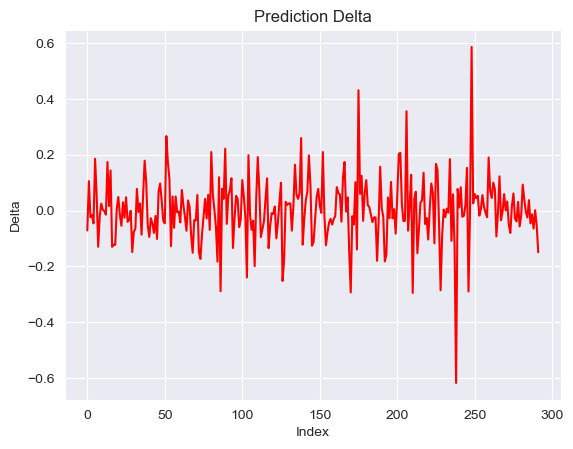

In [13]:
fig, ax1 = plt.subplots()
plt.title('Prediction Delta')
plt.ylabel('Delta')
plt.xlabel('Index')
ax1.plot(np.subtract(y_test.to_numpy(),y_hat), color='red', linestyle='-')